In [1]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')

import pyrcel as pm
import numpy as np
from argparse import ArgumentParser, RawDescriptionHelpFormatter
import yaml

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dist = pm.distributions.jaenicke_distributions
#maritime: larger particles may be sea salt;  smaller particles may be organic substances
maritime = pm.AerosolSpecies('Maritime', dist['Maritime'], kappa = 1., bins=200)
maritime_m = [maritime]

#remote continental: 
continental = pm.AerosolSpecies('Continental', dist['Remote Continental'], kappa = .5, bins=200)
continental_m = [continental]

#polar aerosols: larger particles may be sea salts; smaller particles may be sulfates
polar = pm.AerosolSpecies('Polar', dist['Polar'], kappa = 1., bins=200)
polar_m = [polar]

#Urban: let's assume sulfates from pollution sources
urban = pm.AerosolSpecies('Urban', dist['Urban'], kappa = .9, bins=200)
urban_m = [urban]

#background: larger particles may be dust; 
background = pm.AerosolSpecies('Background', dist['Background'], kappa = .3, bins=200)
background_m = [background]

#rural:
rural = pm.AerosolSpecies('Rural', dist['Rural'], kappa = .3, bins = 200)
rural_m = [rural]

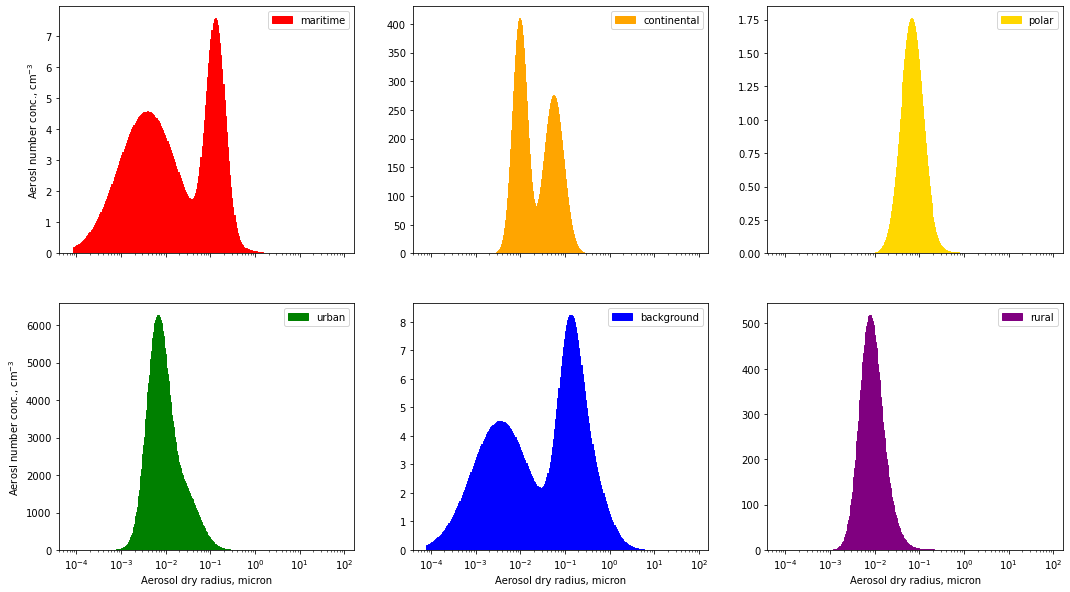

In [3]:
fig, axes = plt.subplots(2,3, figsize=(18,10), sharex=True)
ax = axes.flatten()

aerosols_1 = [maritime, continental, polar, urban, background, rural]
labels = ['maritime', 'continental', 'polar', 'urban', 'background', 'rural']
colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple']
for i, aerosol in enumerate(aerosols_1):
    ax[i].grid(False, 'minor')
    ax[i].bar(aerosol.rs[:-1], aerosol.Nis*1e-6, np.diff(aerosol.rs),
        color=colors[i], label=labels[i], edgecolor=colors[i])
    ax[i].semilogx()
    ax[i].legend(loc='upper right')
    
ax[3].set_xlabel("Aerosol dry radius, micron"); ax[4].set_xlabel("Aerosol dry radius, micron"); ax[5].set_xlabel("Aerosol dry radius, micron")
ax[0].set_ylabel("Aerosl number conc., cm$^{-3}$"); ax[3].set_ylabel("Aerosl number conc., cm$^{-3}$")
plt.savefig('./%s.png' %('plots/Lab5-Afrifa-Fig1'),bbox_inches='tight',dpi=400)

In [4]:
V = [1., 5, .5, 2, 1., 1.] # updraft speed, m/s

dt = 1.0 # timestep, seconds

S0 = -0.02#, -0.02, -0.02  # Supersaturation, 1-RH (98% here)

CDNC(maritime) = 188.0
------------------------
          total = 188.0 / 465 ~ act frac = 0.40

CDNC(continental) = 1933.6
------------------------
          total = 1933.6 / 14053 ~ act frac = 0.14

CDNC(polar) = 43.7
------------------------
          total = 43.7 /  50 ~ act frac = 0.87

CDNC(urban) = 3383.3
------------------------
          total = 3383.3 / 315008 ~ act frac = 0.01

CDNC(background) = 270.5
------------------------
          total = 270.5 / 579 ~ act frac = 0.47

CDNC(rural) = 697.1
------------------------
          total = 697.1 / 20237 ~ act frac = 0.03



Text(0, 0.5, 'Height, m')

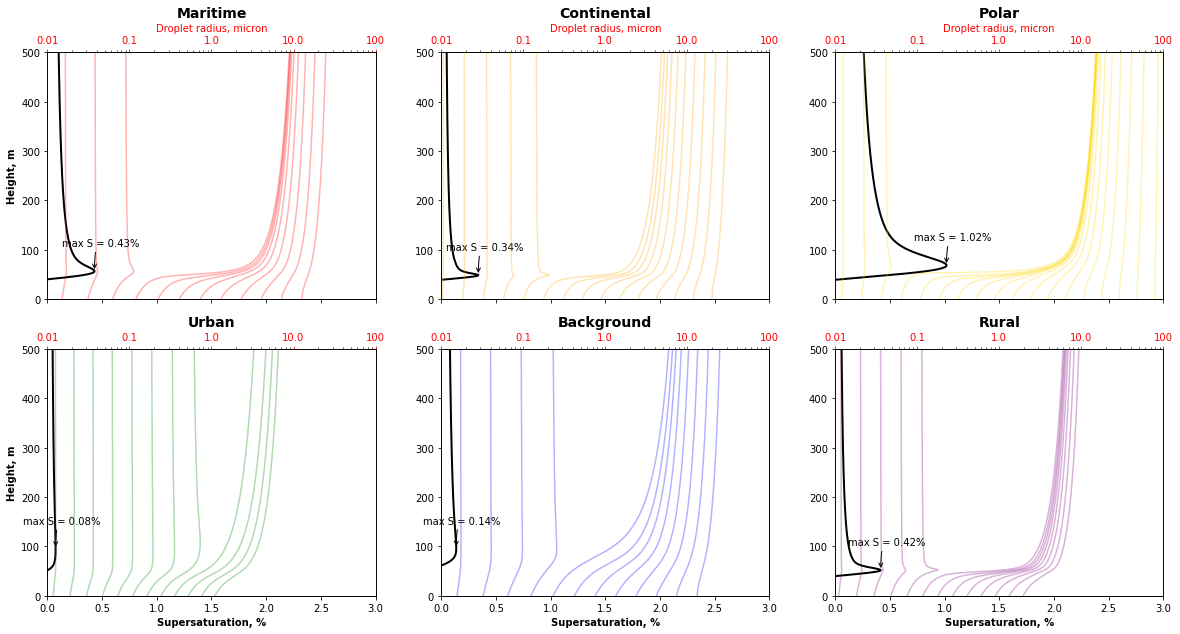

In [14]:
mari_P0, mari_T0, mari_t_end = 90000, 283, 500/V[0]
mari_model = pm.ParcelModel(maritime_m, V[0], mari_T0, S0, mari_P0,console=False, accom = 0.3)

cont_P0, cont_T0, cont_t_end = 90000, 283, 500/V[1]
cont_model = pm.ParcelModel(continental_m, V[1], cont_T0, S0, cont_P0,console=False, accom = 0.3)

polar_P0, polar_T0, polar_t_end = 96000, 263, 500/V[2]
polar_model = pm.ParcelModel(polar_m, V[2], polar_T0, S0, polar_P0,console=False, accom = 0.3)

urban_P0, urban_T0, urban_t_end = 98000, 283, 500/V[3]
urban_model = pm.ParcelModel(urban_m, V[3], urban_T0, S0, urban_P0,console=False, accom = 0.3)

back_P0, back_T0, back_t_end = 90000, 283, 500/V[4]
back_model = pm.ParcelModel(background_m, V[4], back_T0, S0, back_P0,console=False, accom = 0.3)


rural_P0, rural_T0, rural_t_end = 90000, 283, 500/V[5]
rural_model = pm.ParcelModel(rural_m, V[5], rural_T0, S0, rural_P0,console=False, accom = 0.3)


fig, axes = plt.subplots(2,3, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0.2)
ax = axes.flatten()

aerosols = [maritime, continental, polar, urban, background, rural]
aerosol_models = [mari_model, cont_model, polar_model, urban_model, back_model, rural_model]
model_t_ends = [mari_t_end, cont_t_end, polar_t_end, urban_t_end, back_t_end, rural_t_end]
Labels = ['Maritime', 'Continental', 'Polar', 'Urban', 'Background', 'Rural']
colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple']
for i, aerosol_model in enumerate(aerosol_models):
    #run the parcel model
    parcel_trace, aerosol_traces = aerosol_model.run(model_t_ends[i], dt, solver='cvode')
    
    aerosol_array = aerosol_traces[Labels[i]].values
    ax[i].plot(aerosol_array[:, ::10]*1e6, parcel_trace['z'], color=colors[i],
         label=Labels[i], alpha = .3)
    ax[i].semilogx()
    ax[i].set_xlim(1e-2, 100.)
    ax[i].set_xticks([1e-2, 1e-1, 1e0, 1e1,1e2], [0.01, 0.1, 1.0, 10.0,100])
    ax[i].set_ylim(0, 500)
    
    
    ax_drop_s = ax[i].twiny()
    ax_drop_s.plot(parcel_trace['S']*100., parcel_trace['z'], color='k', lw=2)
    Smax = parcel_trace['S'].max()*100
    z_at_smax = parcel_trace['z'].iloc[parcel_trace['S'].argmax()]
    ax_drop_s.annotate("max S = %0.2f%%" % Smax,
                 xy=(Smax, z_at_smax),
                 xytext=(Smax-0.3, z_at_smax+50.),
                 arrowprops=dict(arrowstyle="->", color='k',
                                 connectionstyle='angle3,angleA=0,angleB=90'),
                 zorder=10)
    
    ax_drop_s.set_xlim(0, 3)
    ax_drop_s.xaxis.label.set_color('red')
    ax_drop_s.tick_params(axis='x', colors='red')
    
    
    for j in [0,1,2]:
        if i ==j:
            ax_drop_s.set_xlabel("Supersaturation, %")
            
    for axx in [ax[i], ax_drop_r]:
        axx.grid(False, 'both')
        
    ax[i].set_title(Labels[i], fontsize = 14, fontweight='bold')
    
    aerosol_trace = aerosol_traces[Labels[i]]
    ind_final = int(model_t_ends[i]/dt) - 1
    T = parcel_trace['T'].iloc[ind_final]
    
    eq_aerosol, kn_aerosol, alpha_aerosol, phi_aerosol = \
        pm.binned_activation(Smax/100, T, aerosol_trace.iloc[ind_final],  aerosols[i])
    eq_aerosol *= aerosols[i].total_N
    
    print("CDNC("+labels[i]+") = {:3.1f}".format(eq_aerosol))
    print("------------------------")
    print("          total = {:3.1f} / {:3.0f} ~ act frac = {:1.2f}".format(
          eq_aerosol,
          aerosols[i].total_N,
          (eq_aerosol)/(aerosols[i].total_N)))
    print()

ax[3].set_xlabel("Droplet radius, micron",fontweight='bold'); ax[4].set_xlabel("Droplet radius, micron", fontweight='bold'); ax[5].set_xlabel("Droplet radius, micron", fontweight='bold')
ax[0].set_ylabel("Height, m", fontweight='bold'); ax[3].set_ylabel("Height, m", fontweight='bold')
plt.savefig('./%s.png' %('plots/Lab5-Afrifa-Fig2'),bbox_inches='tight',dpi=400)